# Startup Sucess Rate prediction <a class="anchor"  id="3"></a>

<img src="startup.png" alt="Alt Text" width="600" height="50" align="center">
 


# Task : Startup Sucess Rate prediction
## Project Overview
In this project, we aim to predict the success rate of startups using machine learning techniques. The success of startups can be influenced by various factors, and our goal is to build predictive models that can provide insights into the likelihood of a startup's success.

## Problem Statement
The main objective of this project is to develop a model that can accurately predict whether a startup will succeed or not based on a set of features. This prediction can help investors, entrepreneurs, and stakeholders make informed decisions about investing in or supporting a particular startup.

## Dataset
The dataset used for this project contains information about different startups, including various attributes such as funding, location, industry, team size, marketing strategies, and more. Each startup is labeled as successful or not successful based on historical data.

## Workflow
1. **Data Preprocessing:** Clean and preprocess the dataset, handle missing values, encode categorical features, and perform feature scaling if necessary.

2. **Exploratory Data Analysis (EDA):** Explore the dataset to understand the distribution of features, correlations between variables, and identify potential patterns that could impact startup success.

3. **Feature Selection:** Select relevant features that have a significant impact on predicting startup success. This step involves analyzing feature importance and correlation.

4. **Model Selection:** Choose a set of machine learning algorithms suitable for classification tasks. Common choices include Random Forest, Gradient Boosting, XGBoost, Logistic Regression, etc.

5. **Model Training:** Split the dataset into training and testing sets. Train the selected models on the training data using appropriate hyperparameters.

6. **Model Evaluation:** Evaluate the models using performance metrics such as accuracy, precision, recall, F1-score, and confusion matrix. Select the model with the best performance.

7. **Hyperparameter Tuning:** Fine-tune the hyperparameters of the selected model using techniques like Grid Search or Random Search to improve performance further.

8. **Prediction and Interpretation:** Use the trained model to predict the success rate of new startups. Interpret the model's predictions and analyze feature importance.

9. **Visualization:** Visualize the results, including the confusion matrix and feature importance, to provide a clear understanding of the model's performance and insights.


# Importing Important Libraries

In [268]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay

In [269]:
data = pd.read_csv('startup data.csv')

In [270]:
data.shape

(923, 49)

In [271]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [272]:
data.isnull().sum().sort_values(ascending=False).head(10)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
Unnamed: 0                    0
is_biotech                    0
is_software                   0
is_web                        0
is_mobile                     0
dtype: int64

In [273]:
# Let's look at percentage of missing values
print("Percentage of missing values in 'closed_at' column: % {:.2f}". format((data.closed_at.isnull().sum())/len(data)*100))
print("Percentage of missing values in 'Unnamed: 6' column: % {:.2f}". format((data["Unnamed: 6"].isnull().sum())/len(data)*100))
print("Percentage of missing values in 'age_last_milestone_year' column  : % {:.2f}". format((data.age_last_milestone_year.isnull().sum())/len(data)*100))
print("percentage of missing values in 'age_first_milestone_year' column : % {:.2f}". format((data.age_first_milestone_year.isnull().sum())/len(data)*100))

Percentage of missing values in 'closed_at' column: % 63.71
Percentage of missing values in 'Unnamed: 6' column: % 53.41
Percentage of missing values in 'age_last_milestone_year' column  : % 16.47
percentage of missing values in 'age_first_milestone_year' column : % 16.47


In [274]:
data = data.drop(['Unnamed: 0','Unnamed: 6','latitude','longitude','zip_code','id','name','object_id'], axis = 1)

### Data Preprocessing

#### State Code Variable

1. **Check whether the state_code and state_code.1 variables contain the same data for each row** - One row is not equal to each other, because in state_code.1 variable it is a missing value. Therefore we assume the correct column is state_code. 

In [275]:
print(data['state_code'].equals(data['state_code.1']))

False


In [276]:
for index, row in data.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [277]:
data.drop(["state_code.1"], axis=1, inplace=True)

In [278]:
data['State'] = 'other'
data.loc[(data['state_code'] == 'CA'), 'State'] = 'CA'
data.loc[(data['state_code'] == 'NY'), 'State'] = 'NY'
data.loc[(data['state_code'] == 'MA'), 'State'] = 'MA'
data.loc[(data['state_code'] == 'TX'), 'State'] = 'TX'
data.loc[(data['state_code'] == 'WA'), 'State'] = 'WA'

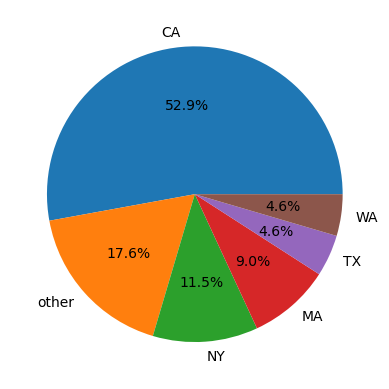

In [279]:
state_count = data['State'].value_counts()
plt.pie(state_count, labels = state_count.index, autopct = '%1.1f%%')
plt.show()

In [280]:
data = data.drop(['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate'],axis =1)

#### Category code variable

In [281]:
category = data['category_code'].value_counts().to_frame()
category['proportion'] = category['category_code']/sum(category['category_code'])*100
category

,category_code,proportion
software,153,16.576381
web,144,15.601300
mobile,79,8.559047
enterprise,73,7.908992
advertising,62,6.717226
games_video,52,5.633803
semiconductor,35,3.791983
network_hosting,34,3.683640
biotech,34,3.683640
hardware,27,2.925244


In [282]:
data['category'] = 'other'
data.loc[(data['category_code'] == 'software'), 'category'] = 'software'
data.loc[(data['category_code'] == 'web'), 'category'] = 'web'
data.loc[(data['category_code'] == 'mobile'), 'category'] = 'mobile'
data.loc[(data['category_code'] == 'enterprise'), 'category'] = 'enterprise'
data.loc[(data['category_code'] == 'advertising'), 'category'] = 'advertising'
data.loc[(data['category_code'] == 'games_video'), 'category'] = 'games_video'
data.loc[(data['category_code'] == 'semiconductor'), 'category'] = 'semiconductor'
data.loc[(data['category_code'] == 'network_hosting'), 'category'] = 'network_hosting'
data.loc[(data['category_code'] == 'biotech'), 'category'] = 'biotech'
data.loc[(data['category_code'] == 'hardware'), 'category'] = 'hardware'

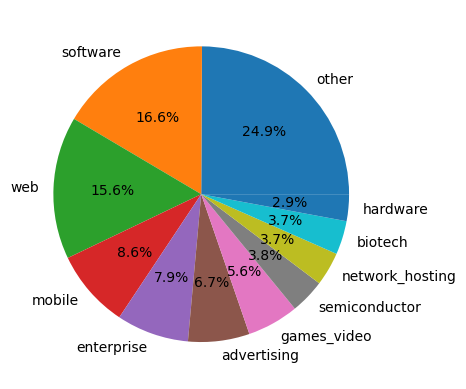

In [283]:
category_count = data['category'].value_counts()
plt.pie(category_count, labels = category_count.index, autopct = '%1.1f%%')
plt.show()

In [284]:
data = data.drop(['category_code','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],axis = 1)

#### Labels and Status Variables

1. **Check whether the labels and status variables contain the same data for each row** 

In [285]:
data["status"].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [286]:
data['labels'].value_counts()

1    597
0    326
Name: labels, dtype: int64

In [287]:
data["status"]=data['labels']

In [288]:
data['status'].dtypes

dtype('int64')

In [289]:
data = data.drop(['labels'], axis = 1)

In [290]:
prop_df = data.groupby('status').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

Text(0.5, 1.0, 'Distribution of Status of the Startup')

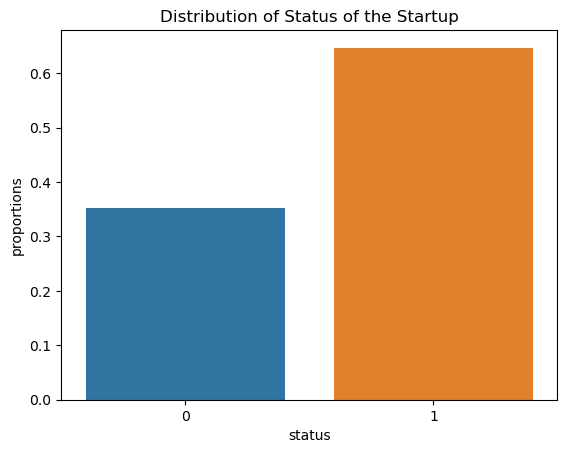

In [291]:
sns.barplot(data = prop_df, x = 'status', y = 'proportions')
plt.title('Distribution of Status of the Startup')

#### Founded_at and Closed_at Variable

1. **Changed the Founded_at column into a new column Founded_year**
2. **Check the missing values in closed_at variable** - The missing values in the closed_at column are due to the fact that th status of the startup is 'acquired' meaning they are not closed. But some acquired startups have a closed date. Therefore those rows were removed from the dataset.

In [292]:
data['founded_at'] = data['founded_at'].apply(pd.to_datetime)
data['founded_year'] = data['founded_at'].dt.strftime('%Y')
data["last_funding_at"]=pd.to_datetime(data["last_funding_at"])

In [293]:
data['closed_at'] = data['closed_at'].fillna(0)
data['closed_at'] = data['closed_at'].apply(str)

In [294]:
closed = []
for index, row in data.iterrows():
    if ((row['closed_at'] != '0') and (row['status'] == 1)) == True:
        closed.append(True)

In [295]:
closed.count(True)

9

In [296]:
df = data.loc[(data['closed_at']!='0') & (data['status'] == 1)]
df.style.set_properties(**{'background-color': 'yellow'}, subset=['closed_at','status'])

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year
73,CA,San Francisco,2003-01-01 00:00:00,2/1/2001,9/1/2004,2012-05-01 00:00:00,1.668500,9.337000,7.380800,10.474000,17,4,40400000,3,0,0,1,1,1,1,1.666700,1,1,CA,advertising,2003
104,CA,San Francisco,2007-07-01 00:00:00,9/1/2011,1/1/2007,2008-10-01 00:00:00,-0.495900,1.254800,2.172600,4.600000,21,2,6000000,2,0,1,1,0,0,0,4.000000,1,1,CA,web,2007
291,MD,Columbia,2000-01-01 00:00:00,10/15/2009,4/24/2007,2007-04-24 00:00:00,7.315100,7.315100,5.005500,5.005500,6,1,16980999,1,0,0,0,1,0,0,1.000000,1,1,other,biotech,2000
342,TX,Austin,2003-01-01 00:00:00,6/1/2013,6/14/2007,2010-03-23 00:00:00,4.452100,7.227400,7.005500,7.005500,5,2,5992316,1,1,0,1,0,0,0,2.000000,0,1,TX,enterprise,2003
381,CA,Redwood City,2006-03-01 00:00:00,1/1/2012,6/1/2007,2008-01-14 00:00:00,1.252100,1.874000,4.717800,5.095900,13,3,2600000,2,0,1,1,0,0,0,3.666700,1,1,CA,network_hosting,2006
445,MA,Cambridge,2006-01-01 00:00:00,1/1/2008,1/3/2008,2008-01-03 00:00:00,2.005500,2.005500,0.000000,0.000000,1,1,30000000,1,1,0,0,0,0,0,2.000000,1,1,MA,other,2006
473,CA,Burlingame,2007-01-01 00:00:00,12/1/2011,8/1/2007,2009-07-06 00:00:00,0.580800,2.512300,0.591800,4.969900,9,3,1415000,4,1,1,0,0,0,0,1.000000,1,1,CA,other,2007
560,CA,San Francisco,2006-10-01 00:00:00,11/16/2010,12/1/2007,2007-12-01 00:00:00,1.167100,1.167100,1.926000,4.013700,19,1,3000000,4,0,0,1,0,0,0,2.000000,1,1,CA,advertising,2006
756,CA,Mountain View,2004-12-06 00:00:00,5/19/2011,4/4/2006,2007-08-22 00:00:00,1.326000,2.709600,4.369900,6.463000,6,2,29000000,3,0,0,0,1,1,0,2.500000,1,1,CA,software,2004


In [297]:
data = data.drop(df.index.tolist()).reset_index().drop(['index'],axis = 1)

In [298]:
data = data.drop(['founded_at','closed_at'], axis = 1)

In [299]:
prop_df = data.groupby('founded_year').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

Text(0.5, 1.0, 'Distribution of number of startups with year (acuired/not)')

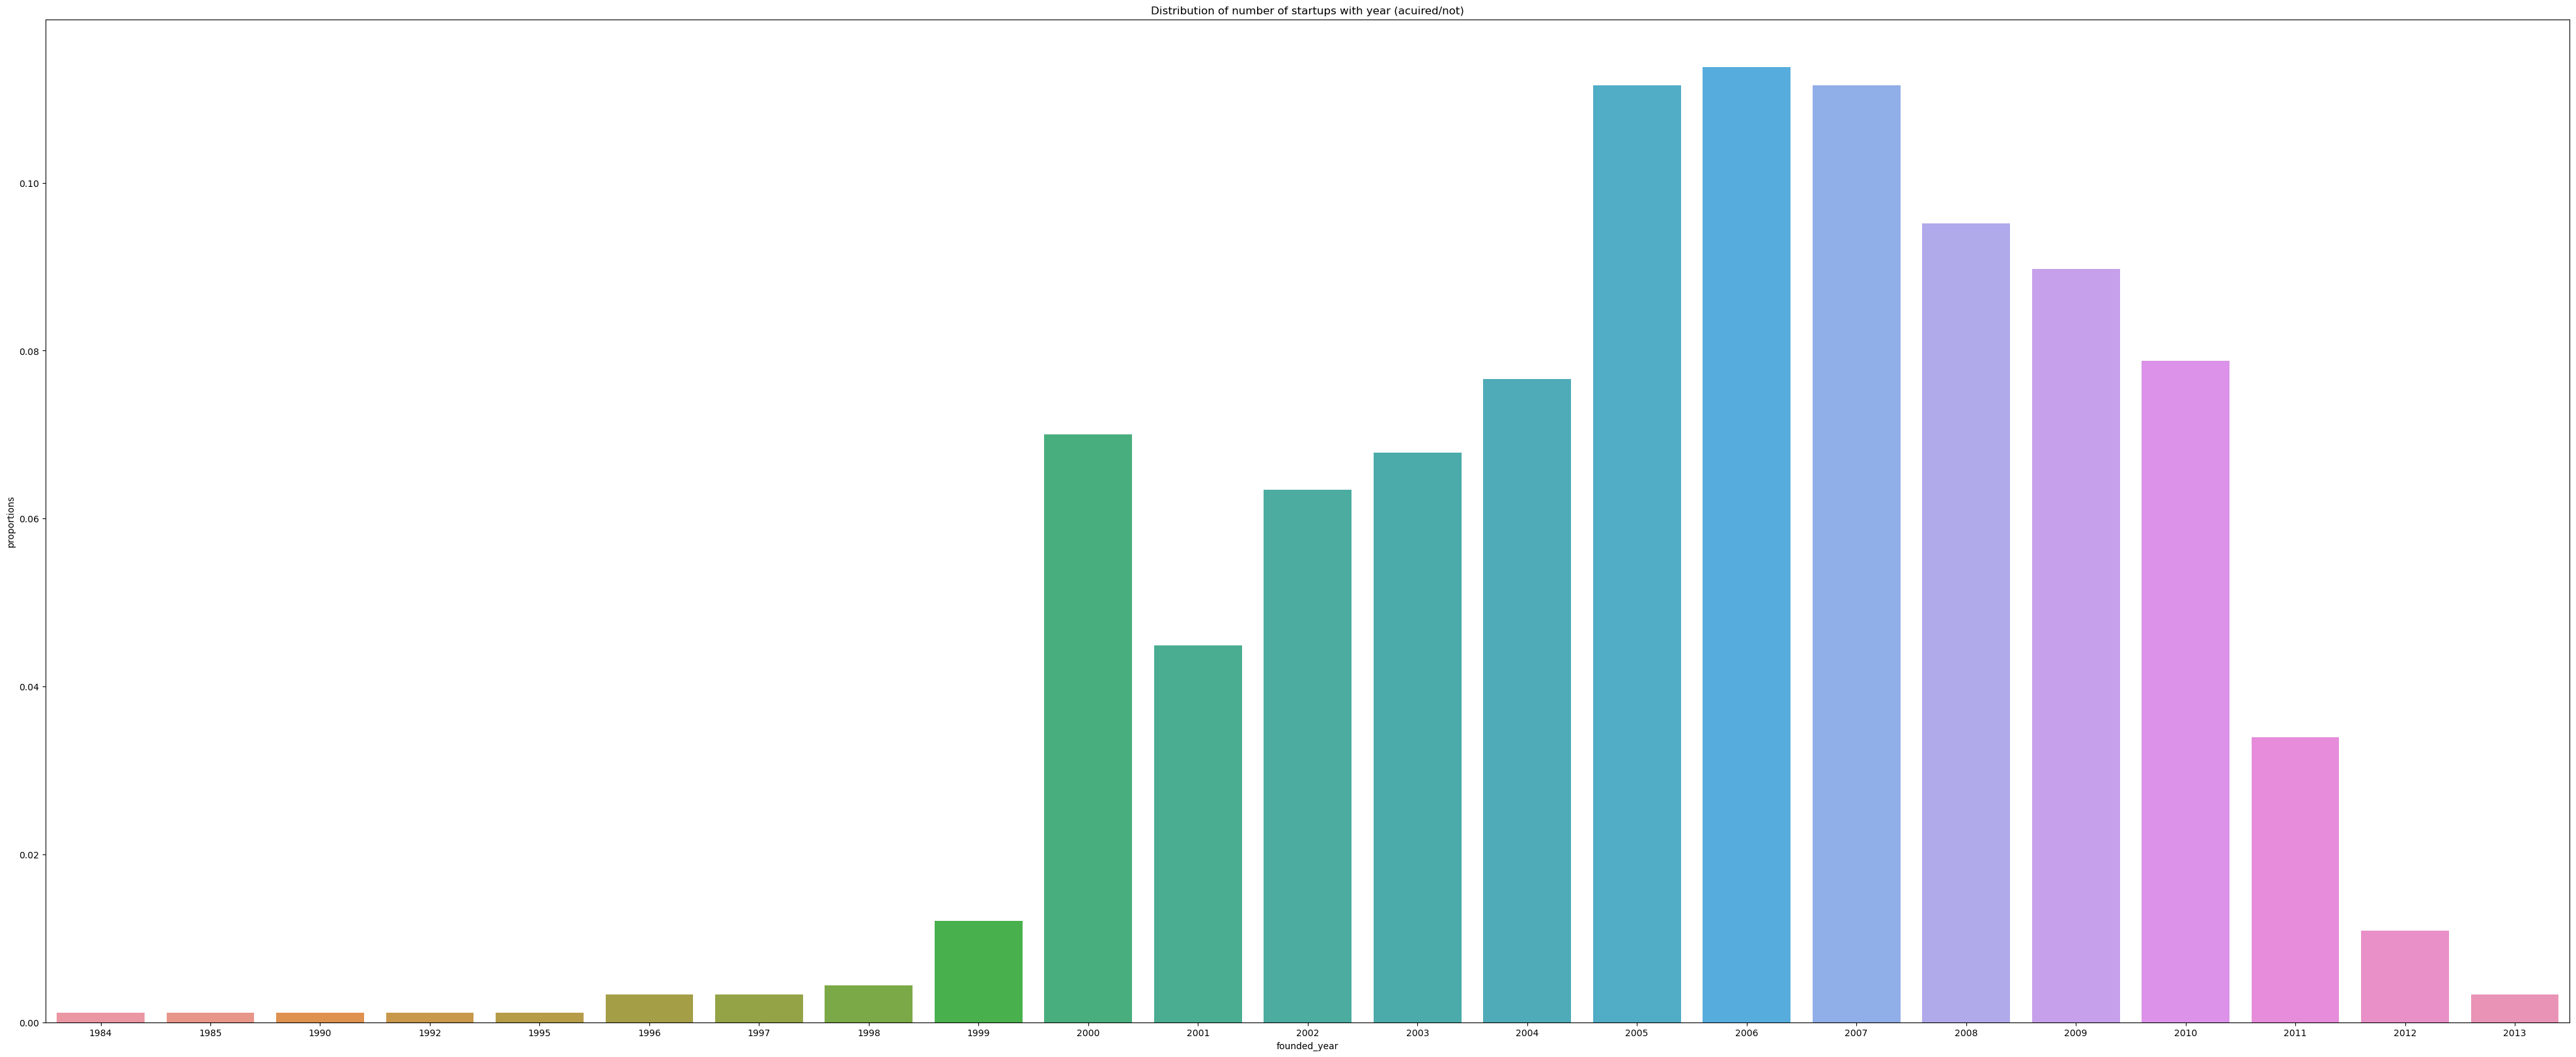

In [300]:
fig, ax = plt.subplots(figsize = (50,20))
sns.barplot(data = prop_df, x = 'founded_year', y = 'proportions')
plt.title('Distribution of number of startups with year (acuired/not)')

#### first_funding_at and last_funding_at variables

In [301]:
data = data.drop(['first_funding_at','last_funding_at'],axis=1)

#### Change the data types

In [302]:
data['has_VC'] = data['has_VC'].apply(str)
data['has_angel'] = data['has_angel'].apply(str)
data['has_roundA'] = data['has_roundA'].apply(str)
data['has_roundB'] = data['has_roundB'].apply(str)
data['has_roundC'] = data['has_roundC'].apply(str)
data['has_roundD'] = data['has_roundD'].apply(str)
data['is_top500'] = data['is_top500'].apply(str)
data['status'] = data['status'].apply(str)

#### Handling Invalid values in Age first and last funding year, Age first and last milestone year

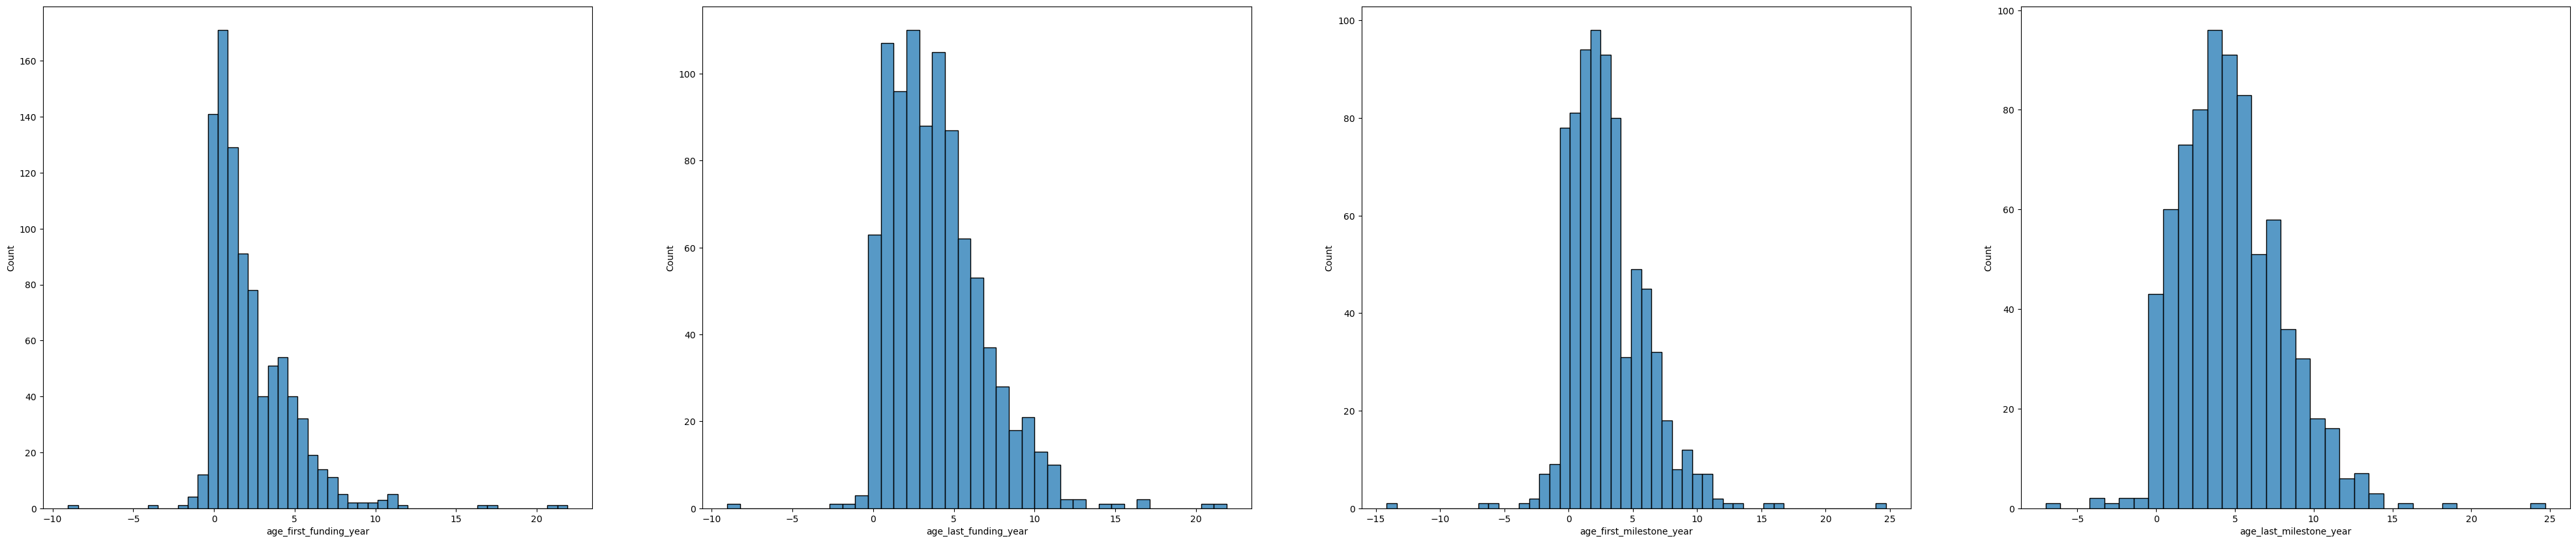

In [303]:
var = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (50,10))

for k, ax in zip(range(4), axes.flatten()):
    sns.histplot(data = data, x = f'{var[k]}', ax = ax)

In [304]:
data['age_first_funding_year'] = np.where(data['age_first_funding_year']<0,0,data['age_first_funding_year'])
data['age_last_funding_year'] = np.where(data['age_last_funding_year']<0,0,data['age_last_funding_year'])
data['age_first_milestone_year'] = np.where(data['age_first_milestone_year']<0,0,data['age_first_milestone_year'])
data['age_last_milestone_year'] = np.where(data['age_last_milestone_year']<0,0,data['age_last_milestone_year'])

#### Handling missing values

<AxesSubplot:xlabel='age_first_milestone_year', ylabel='Count'>

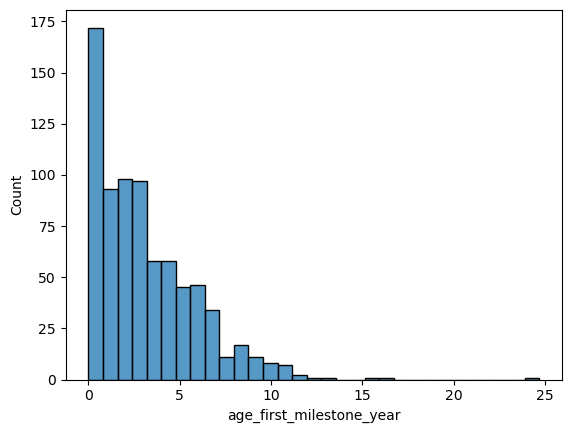

In [305]:
sns.histplot(data = data, x = 'age_first_milestone_year')

<AxesSubplot:xlabel='age_last_milestone_year', ylabel='Count'>

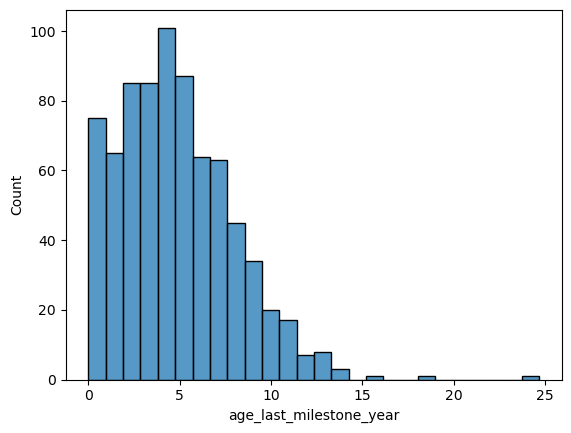

In [306]:
sns.histplot(data = data, x = 'age_last_milestone_year')

In [307]:
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(data['age_first_milestone_year'].mode()[0])
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(data['age_last_milestone_year'].mode()[0])

In [308]:
data.status.unique()

array(['1', '0'], dtype=object)

In [309]:
data["status"] = data["status"].astype(int)

In [310]:
data.head()

,state_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year
0,CA,San Diego,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,1,0,0,0,0,1.0000,0,1,CA,other,2007
1,CA,Los Gatos,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000
2,CA,San Diego,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,1,CA,web,2009
3,CA,Cupertino,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,1,CA,software,2002
4,CA,San Francisco,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010


Drop columns that are unecessary to the analysis:
* **Unnamed: 0 , Unnamed: 6** - No meaning for the variable
* **lattitude, longitude** - The location is specified from the city and state variables
* **id, name, object_id, zip_code** - Unique variables
* **state_code.1, labels** - Column is duplicated
* **is_CA, is_NY, is_MA, is_TX, is_otherstate, is_software, is_web, is_mobile, is_enterprise, is_advertising, is_gamesvideo, is_ecommerce, is_biotech, is_consulting, is_othercategory** - Categories of another column
* **category_code, state_code** - Created a column with fewer categories
* **Closed_at, age_first_funding_year, age_last_funding_year** - The information is in another column 
* **Founded_at** - Created a new column 

### Visualization

#### Categorical Variables - Summary

In [311]:
data.describe(include = ['object'])

,state_code,city,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500,State,category,founded_year
count,914,914,914,914,914,914,914,914,914,914,914,914
unique,35,220,2,2,2,2,2,2,2,6,11,23
top,CA,San Francisco,0,0,1,0,0,0,1,CA,other,2006
freq,482,125,616,682,464,555,701,823,739,482,228,104


#### State vs. Status

Text(0.5, 1.0, 'State vs. Status')

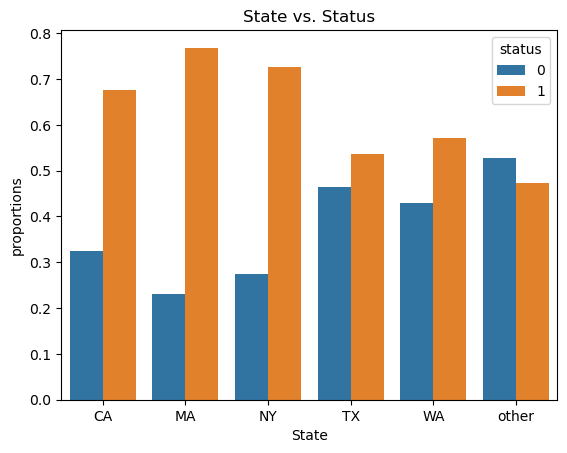

In [312]:
prop_df = data.groupby(['State','status'],group_keys = True).size().reset_index(name='count')
prop_df['proportions'] = prop_df.groupby('State')['count'].apply(lambda x: x/x.sum())
sns.barplot(data = prop_df, x = 'State', y = 'proportions',hue = 'status')
plt.title('State vs. Status')

#### State vs. Category

In [313]:
cat_state = pd.crosstab(index = data['State'], columns = data['category'])

In [314]:
cat_state

category,advertising,biotech,enterprise,games_video,hardware,mobile,network_hosting,other,semiconductor,software,web
State,,,,,,,,,,,
CA,31,20,35,32,21,39,15,114,23,73,79
MA,6,5,5,0,2,10,3,15,2,24,10
NY,12,1,5,14,1,9,1,35,0,7,21
TX,0,0,5,1,1,2,2,13,4,8,5
WA,1,0,5,2,1,5,5,9,0,7,7
other,10,7,17,3,1,14,7,42,6,33,21


#### Category vs. Status

<AxesSubplot:xlabel='category', ylabel='proportions'>

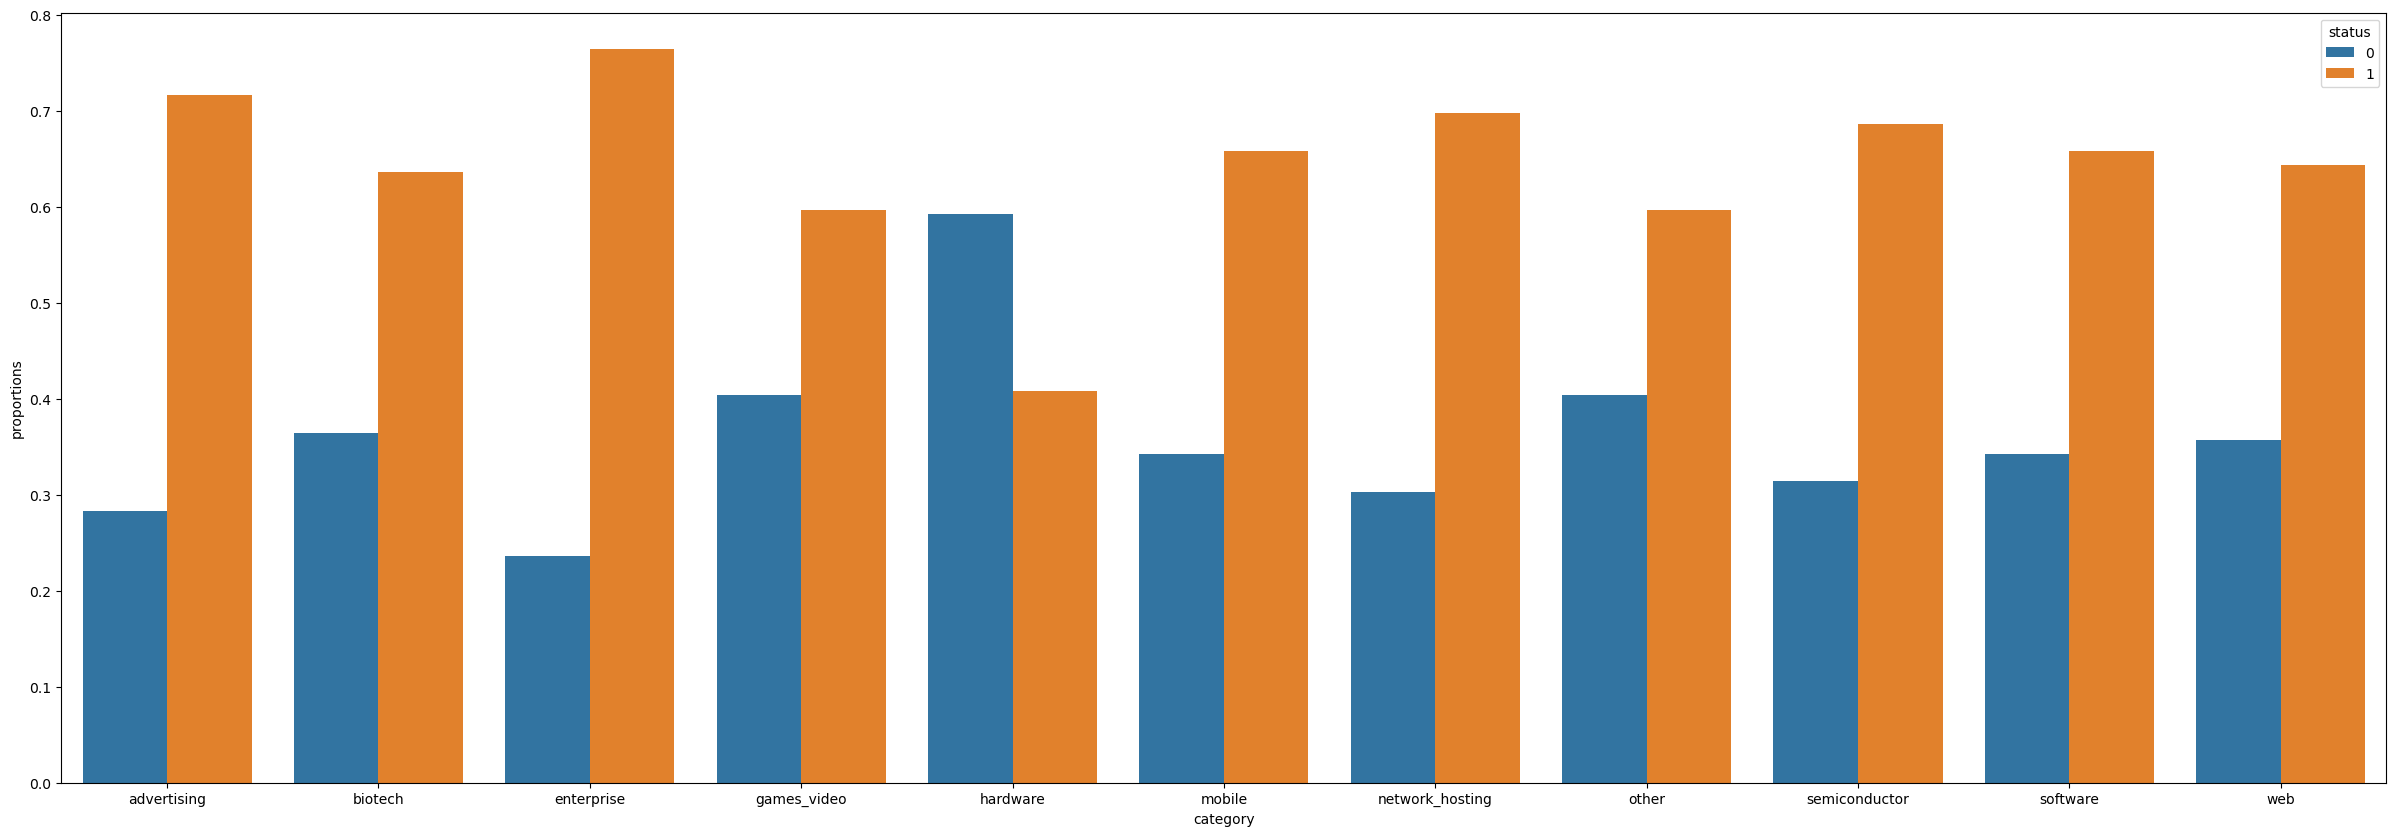

In [315]:
fig, ax = plt.subplots(figsize = (30,10))
prop_df = data.groupby(['category','status']).size().reset_index(name='counts')
prop_df['proportions'] = prop_df.groupby('category')['counts'].apply(lambda x: x/float(x.sum()))
sns.barplot(data = prop_df, x = 'category', y = 'proportions',hue = 'status')

#### Category vs Founded year

In [316]:
cat_year = pd.crosstab(index = data['founded_year'], columns = data['category'])

Text(0.5, 1.0, 'Category wise evolution of startups')

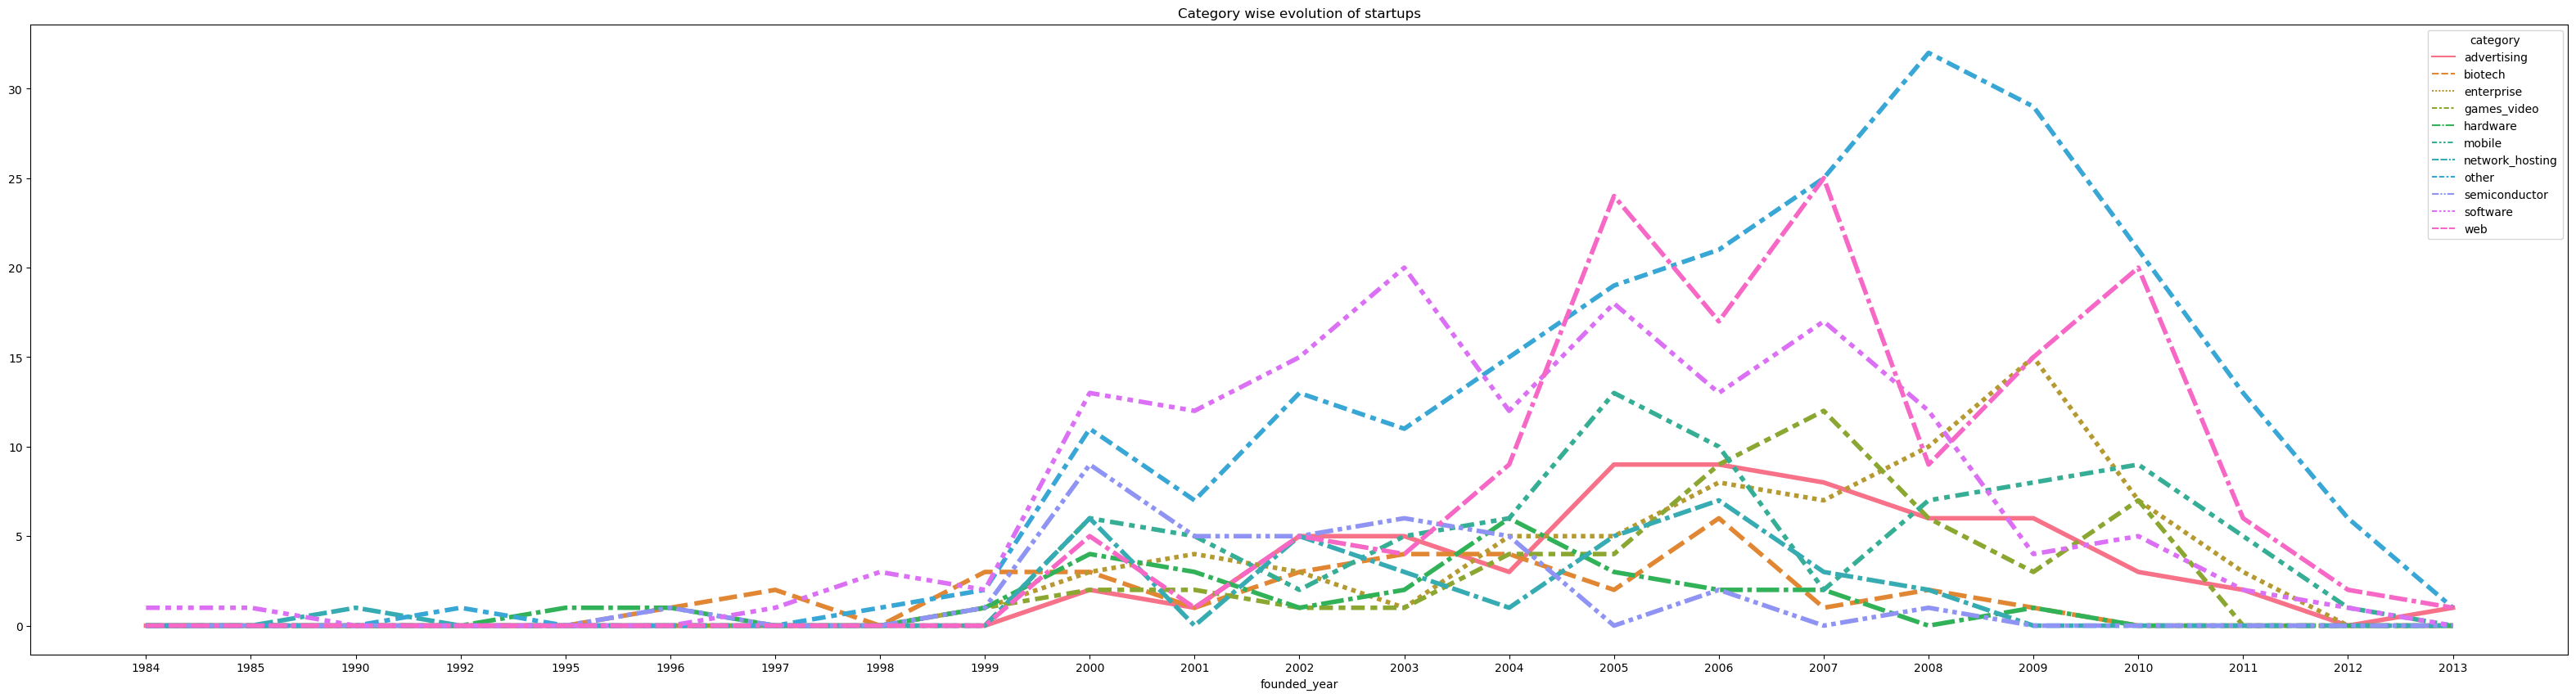

In [317]:
fig, ax = plt.subplots(figsize=(40,10))
sns.lineplot(data = cat_year, lw = 4)
plt.title('Category wise evolution of startups')

#### Founded year vs. Total funding

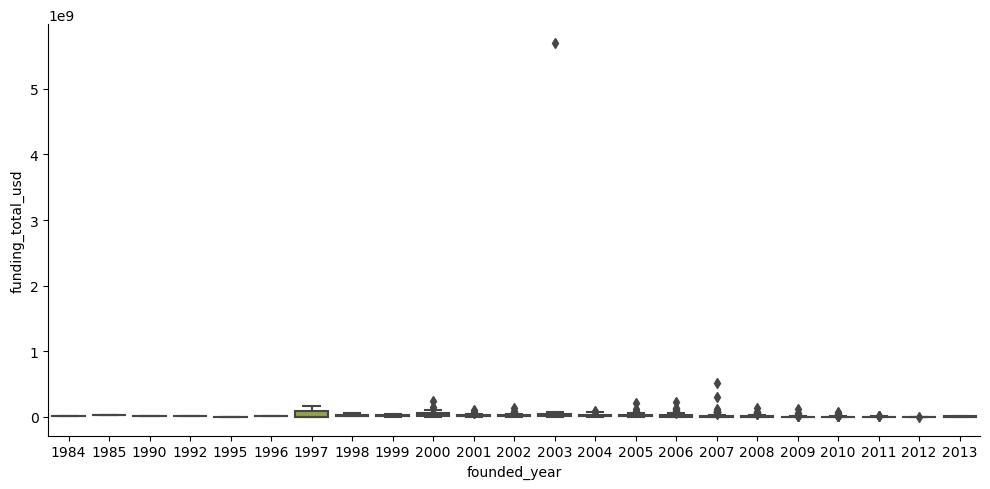

In [318]:
sns.catplot(data=data, x="founded_year", y="funding_total_usd", kind="box",height=5, aspect=2,order = ['1984','1985','1990','1992','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013'])

#### Has_VC, Has_angel, Has_roundA, Has_roundB, Has_roundC, Has_roundD

<AxesSubplot:xlabel='variable', ylabel='count'>

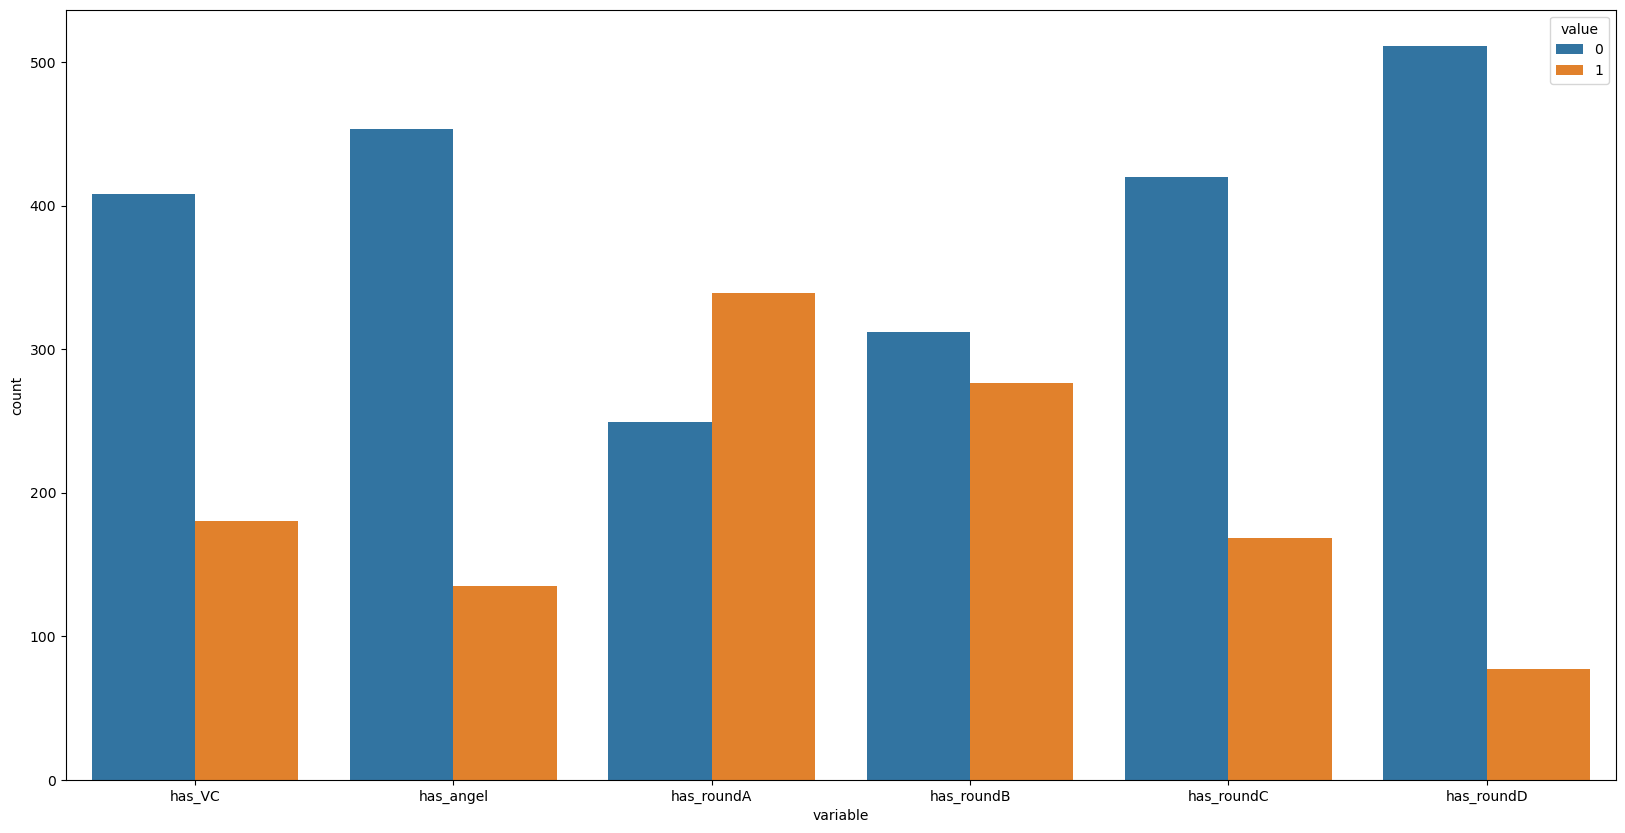

In [319]:
fig, ax = plt.subplots(figsize = (20,10))
d = data.loc[data['status'] == 1]
f = d[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]
sns.countplot(data = pd.melt(f), x = 'variable', hue = 'value')

#### Quantitative Variables summary

In [320]:
data.describe(include = ['float64','int64'])

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,9.140000e+02,914.000000,914.000000
mean,2.270677,3.947489,2.613675,3.985237,7.680525,2.312910,2.552193e+07,1.836980,2.844838
std,2.457724,2.930272,2.816996,3.382481,7.265480,1.394131,1.905590e+08,1.323273,1.880201
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,1.000000
25%,0.568475,1.669175,0.000000,1.000000,3.000000,1.000000,2.712500e+06,1.000000,1.500000
50%,1.449350,3.545200,2.000000,3.754800,5.000000,2.000000,1.000000e+07,2.000000,2.500000
75%,3.578075,5.558900,4.002700,6.026050,10.000000,3.000000,2.465264e+07,3.000000,3.950000
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,16.000000


#### Correlation plot

<AxesSubplot:>

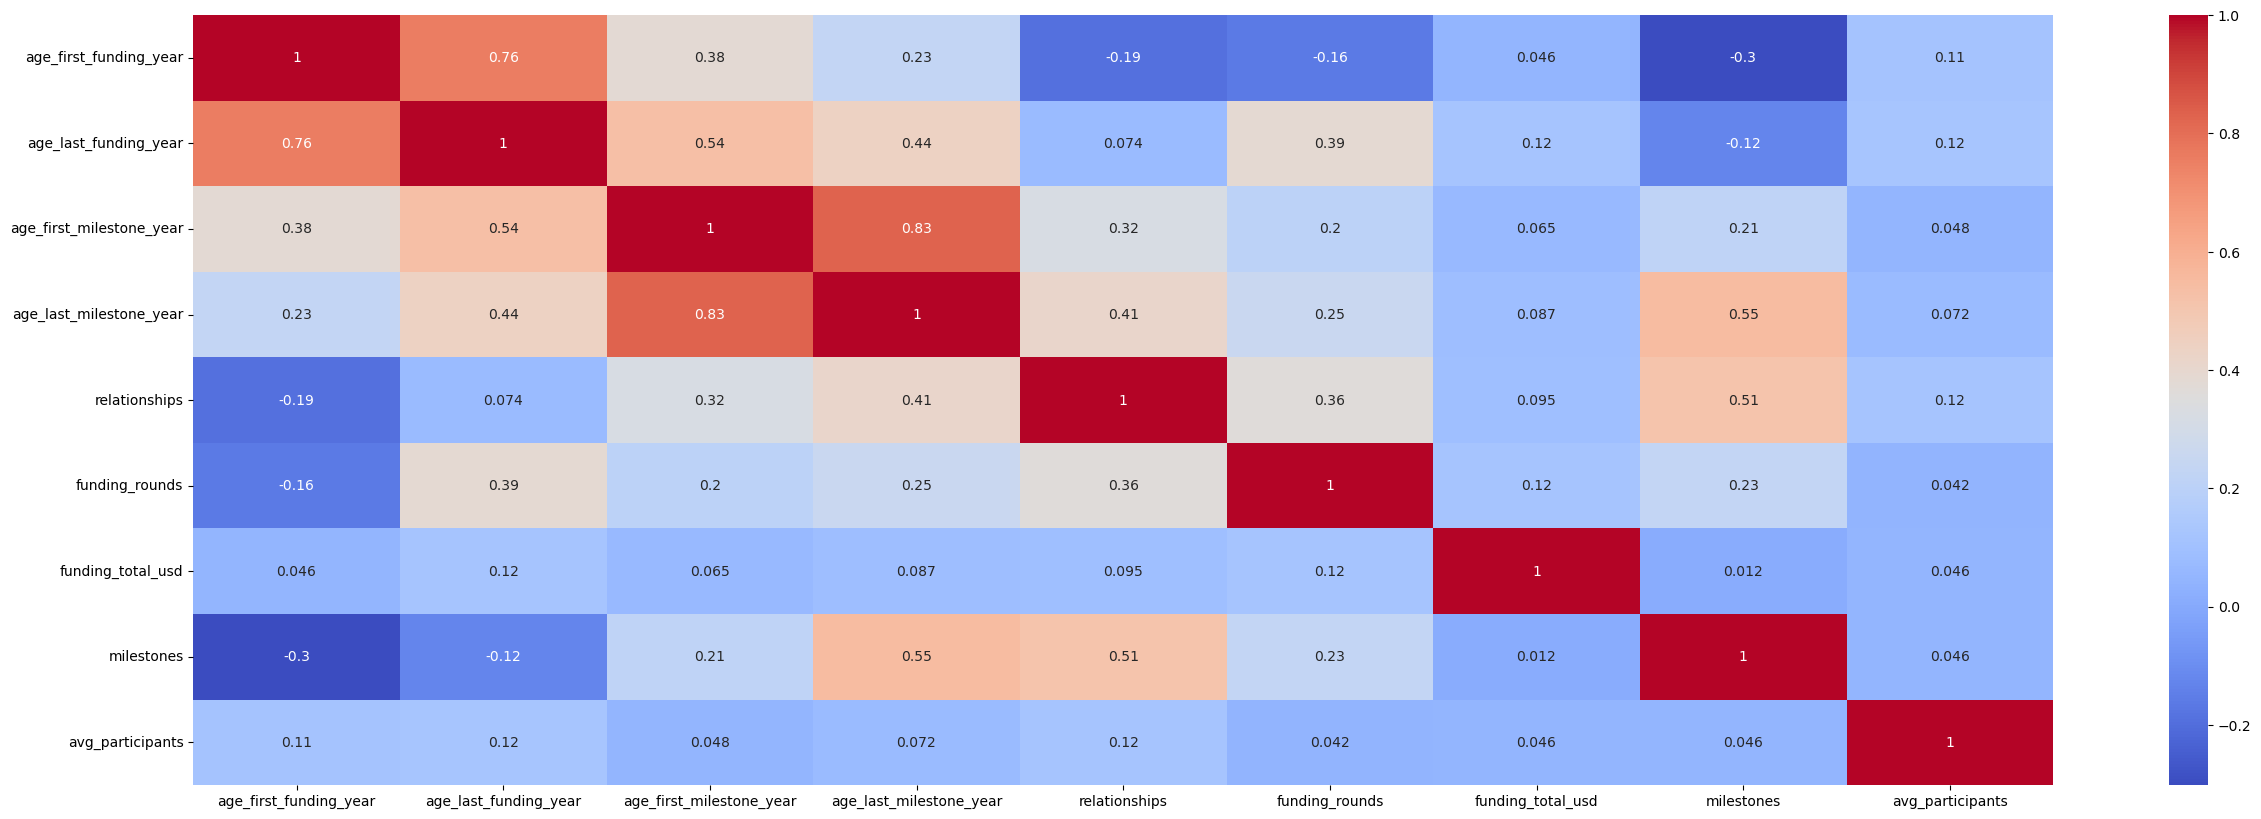

In [321]:
fig, ax = plt.subplots(figsize = (30,10))
corr = data.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

### Models

In [322]:
y = data['status']
x = data.drop('status', axis = 1)

In [323]:
x.head()

,state_code,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,State,category,founded_year
0,CA,San Diego,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,1,0,0,0,0,1.0000,0,CA,other,2007
1,CA,Los Gatos,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,CA,enterprise,2000
2,CA,San Diego,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,CA,web,2009
3,CA,Cupertino,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,CA,software,2002
4,CA,San Francisco,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,CA,games_video,2010


In [324]:
x = pd.get_dummies(x, drop_first = True)

In [325]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({1: 588, 0: 326})
Class distribution after SMOTE: Counter({1: 588, 0: 588})


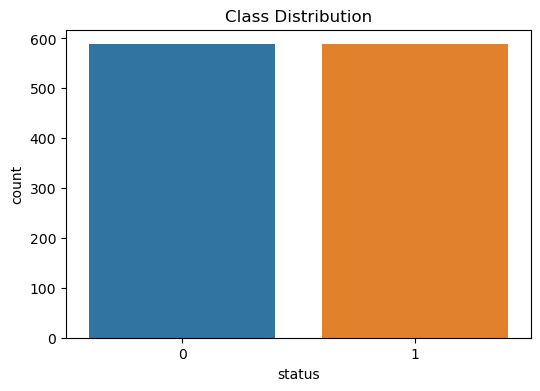

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x=y_resampled)
plt.title('Class Distribution')
plt.show()

In [327]:
#split train and test set
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size =0.3, random_state = 0)

#### Random Forest

In [329]:
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "Gradient Boosting": {"model":GradientBoostingClassifier(), "perf":0},
    "XGBoost": {"model":XGBClassifier(eval_metric='mlogloss'), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(x_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 0.74 sec
Gradient Boosting    trained in 1.36 sec
XGBoost              trained in 1.57 sec
MultinomialNB        trained in 0.02 sec
Logistic Regr.       trained in 0.07 sec
KNN                  trained in 0.02 sec
Decision Tree        trained in 0.05 sec
SVM (Linear)         trained in 0.15 sec
SVM (RBF)            trained in 0.32 sec


In [330]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(x_test, y_test),model["perf"]])

In [331]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy w/o scaling', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy w/o scaling', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy w/o scaling,Training time (sec)
0,Gradient Boosting,0.796034,1.36
1,Random Forest,0.787535,0.74
2,XGBoost,0.779037,1.57
3,Decision Tree,0.736544,0.05
4,KNN,0.674221,0.02
5,MultinomialNB,0.586402,0.02
6,SVM (RBF),0.580737,0.32
7,SVM (Linear),0.473088,0.15
8,Logistic Regr.,0.458924,0.07


In [332]:
for name, model in models.items():

    # Predict on the test data
    y_pred = model['model'].predict(x_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix
    print(f"Confusion matrix for {name}:\n{cm}\n")

Confusion matrix for Random Forest:
[[145  46]
 [ 29 133]]

Confusion matrix for Gradient Boosting:
[[139  52]
 [ 20 142]]

Confusion matrix for XGBoost:
[[143  48]
 [ 30 132]]

Confusion matrix for MultinomialNB:
[[156  35]
 [111  51]]

Confusion matrix for Logistic Regr.:
[[  0 191]
 [  0 162]]

Confusion matrix for KNN:
[[132  59]
 [ 56 106]]

Confusion matrix for Decision Tree:
[[132  59]
 [ 34 128]]

Confusion matrix for SVM (Linear):
[[  6 185]
 [  1 161]]

Confusion matrix for SVM (RBF):
[[160  31]
 [117  45]]



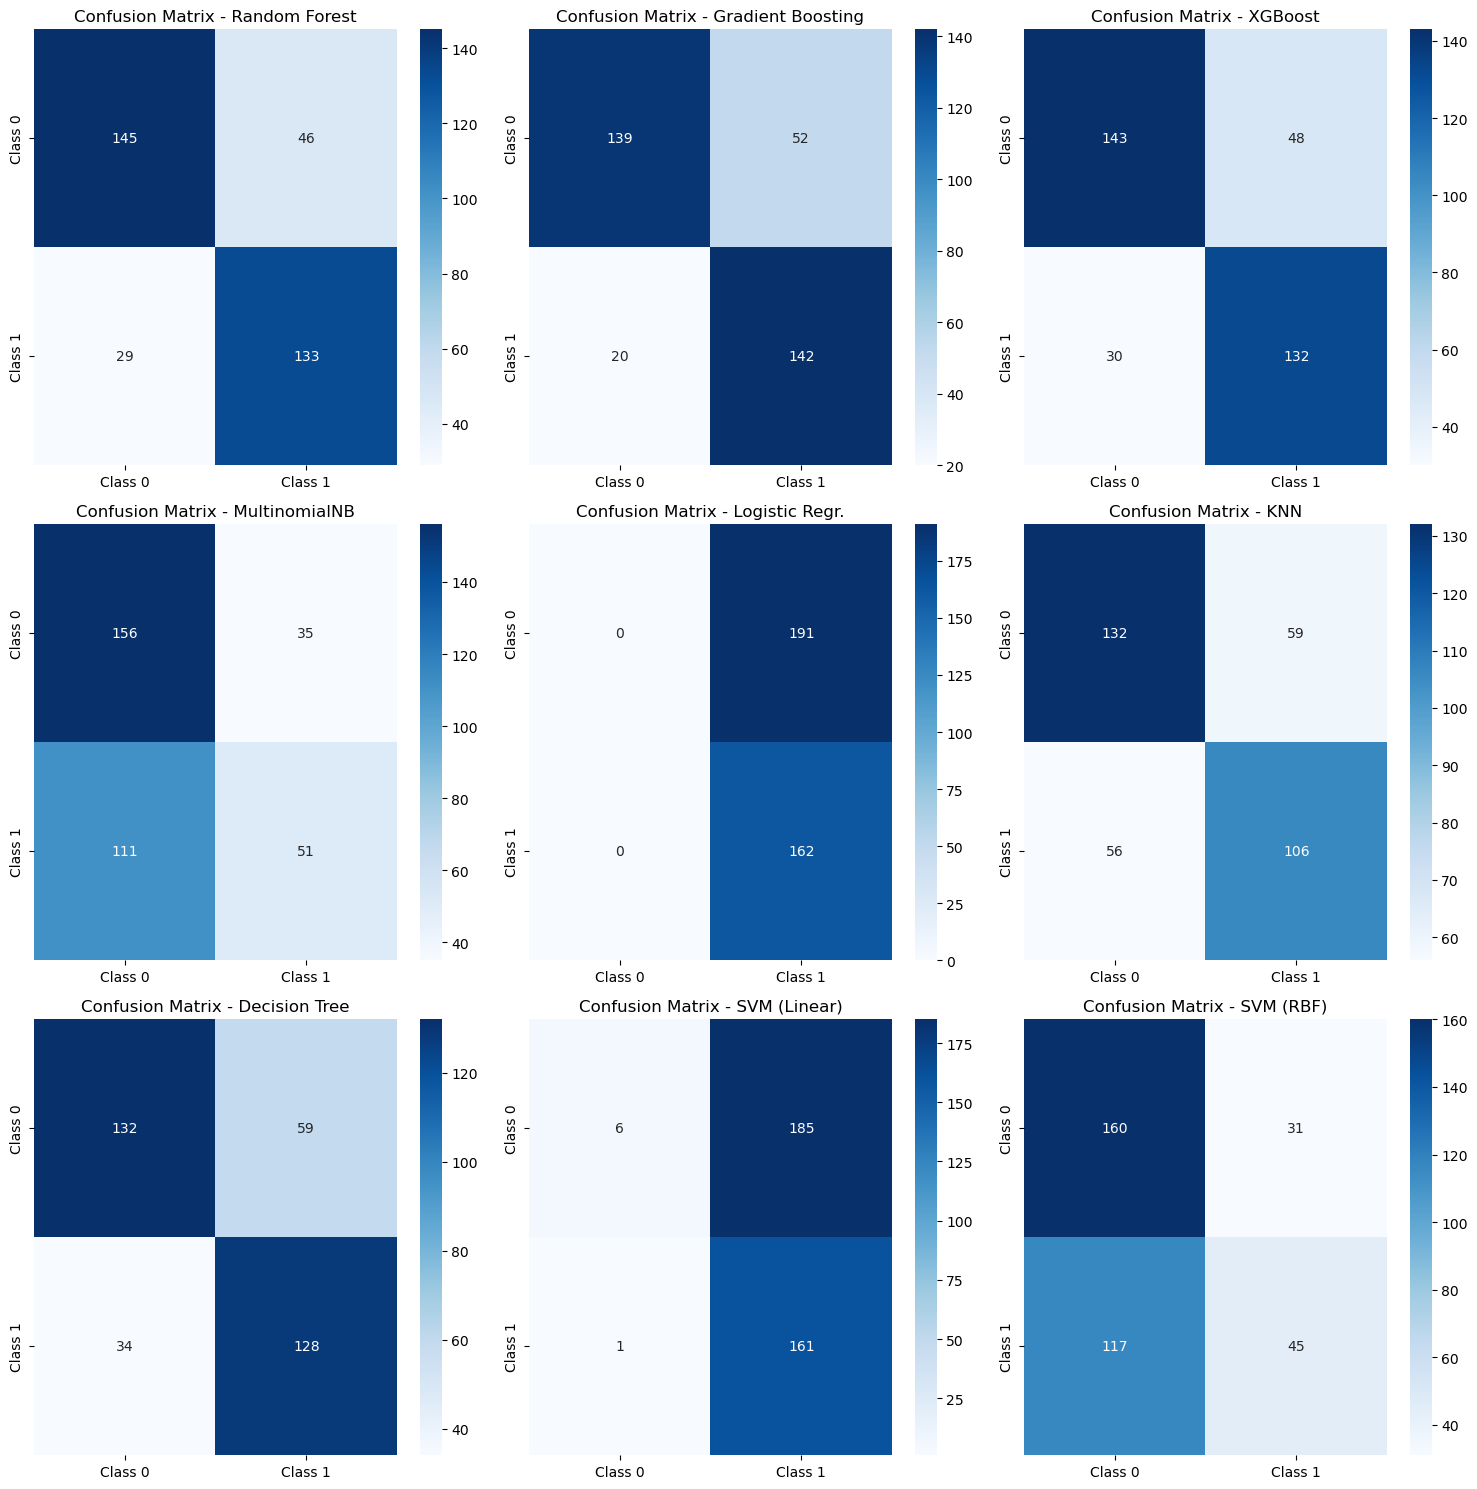

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Define class names (replace with your actual class names)
class_names = ['Class 0', 'Class 1']

# Assuming you have a dictionary 'models' containing trained models
model_names = list(models.keys())  # Get model names

num_rows = 3
num_cols = 3
num_models = len(model_names)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    if i < num_models:
        model_name = model_names[i]
        
        # Predict on the test data
        y_pred = models[model_name]['model'].predict(x_test)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=ax)
        ax.set_title(f"Confusion Matrix - {model_name}")
    else:
        ax.axis('off')  # Hide empty subplots
    
plt.tight_layout()
plt.show()


In [334]:
from sklearn.metrics import classification_report

# Assuming you have trained models and got predictions for each model
for name, model in models.items():
    y_pred = model['model'].predict(x_test)  # Replace X_test with your test data
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(cm)
    
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("=" * 50)


Model: Random Forest
Confusion Matrix:
[[145  46]
 [ 29 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       191
           1       0.74      0.82      0.78       162

    accuracy                           0.79       353
   macro avg       0.79      0.79      0.79       353
weighted avg       0.79      0.79      0.79       353

Model: Gradient Boosting
Confusion Matrix:
[[139  52]
 [ 20 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       191
           1       0.73      0.88      0.80       162

    accuracy                           0.80       353
   macro avg       0.80      0.80      0.80       353
weighted avg       0.81      0.80      0.80       353

Model: XGBoost
Confusion Matrix:
[[143  48]
 [ 30 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75     

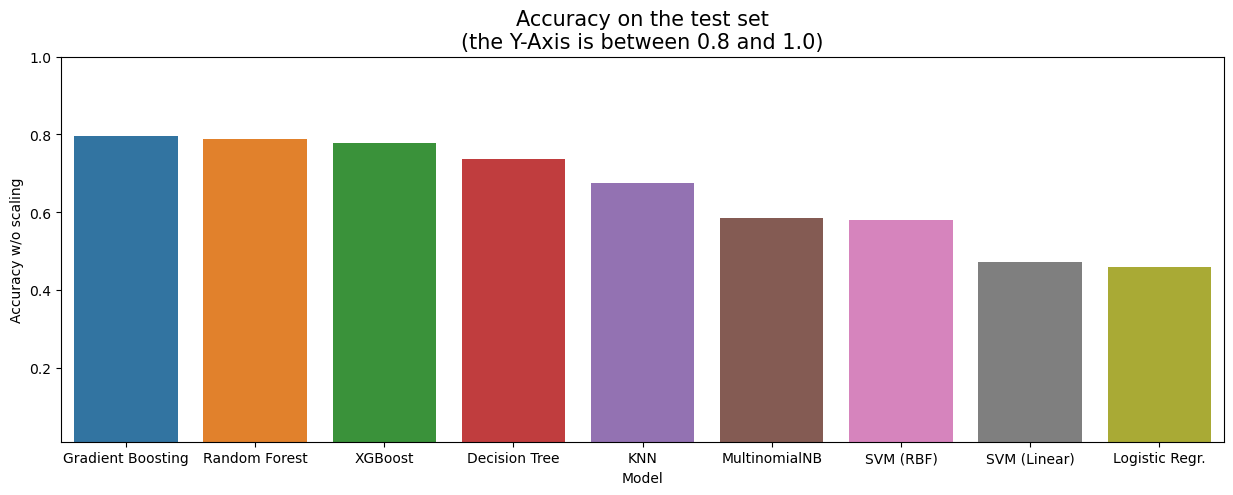

In [335]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy w/o scaling', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.01,1)
plt.show()

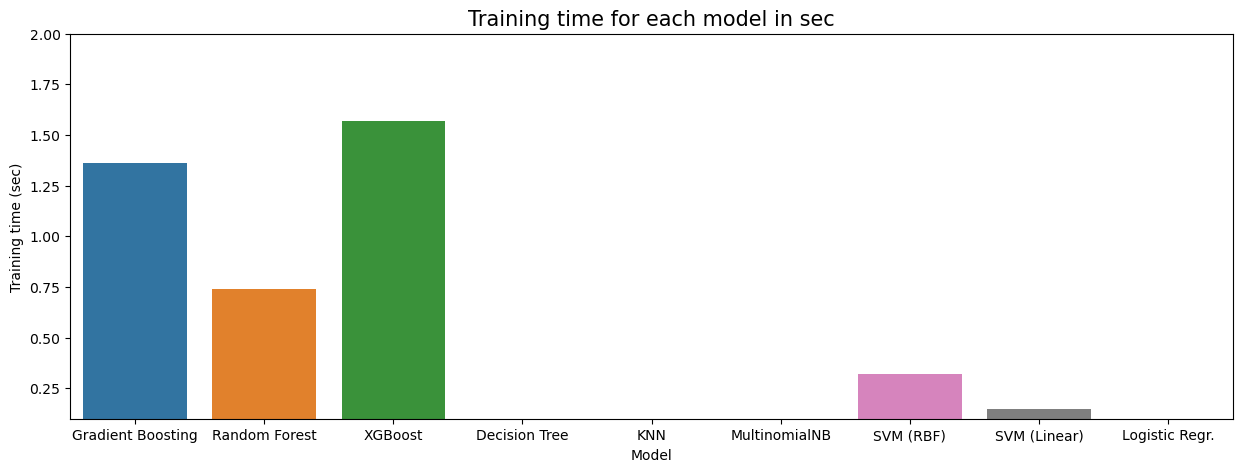

In [339]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0.1,2)
plt.show()

#### Random forest and Gradient boosting  gives the best result on the test set. Nevertheless,  but Random forest  is very fast . In the following part, we'll choose the Random forest  and try various hyperparameters to optimize it.

In [337]:
rf = RandomForestClassifier()
param_grid = {'n_estimators':[100,200,300],
              'max_depth':[10,20,30],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,3],
              'bootstrap':[True,False]}

grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = False)
grid_search.fit(x_train, y_train)

print('Best parameters:', grid_search.best_params_)

Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}


In [338]:
rf = RandomForestClassifier(n_estimators=200,bootstrap=False,max_depth=20,min_samples_leaf=2, min_samples_split=6)
model_rf = rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
cr_rf = classification_report(y_pred_rf, y_test)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       164
           1       0.84      0.72      0.77       189

    accuracy                           0.78       353
   macro avg       0.78      0.78      0.78       353
weighted avg       0.79      0.78      0.78       353

